## K - Means Clustering 

Process:

1) Understanding the Data<br>
2) Performing Elbow method to find Optimal Number of Clusters<br>
3) Training Model using unsupervised Learning <br>
5) Plotting Clusters<br>

#### Importing the required packages

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.cluster import KMeans

### Importing the Data

* I have merged the data and created a single dataframe consisting customer transaction, sales,customer demographics and product sales in previous notebook. -> data variable
* I have also created a customer centric dataframe manipulated from the above mentioned data frame -> cust_df

#### Data - df

In [5]:
data = pd.read_csv("Merged_Data.csv")

In [6]:
data =data.drop(columns='Unnamed: 0')

In [121]:
data.head(2)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,GST,Coupon_Code,Discount_pct,discount_amount,gst_amount,Invoice_Amount,year
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,ELEC10,10.0,15.371,0.15371,158.6729,2019
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,0.1,ELEC10,10.0,15.371,0.15371,158.6729,2019


#### Customer centric Data Frame

In [67]:
cust_df = pd.read_csv("customer_df1.csv")

In [68]:
cust_df.head()
cust_df =cust_df.drop(columns='Unnamed: 0')

In [69]:
cust_df = cust_df.drop(columns=['R_Quantile','F_Quantile','M_Quantile','Transaction_Date'])

In [124]:
cust_df.head(2)

,CustomerID,Quantity,Monetary,Product_SKU_Count,Prod_Cat_Count,Recency,Discount_pct,Frequency,Cluster_3,Cluster_4,Cluster_5
0,12346,3,174.98174,2,2,108,30.000000,2,0,0,2
1,12347,340,12059.17780,59,9,60,25.084746,59,1,3,3


## <font color ="Violet"> Analysis for Chossing K  - Number of Clusters</font>



###  Plotting Cluster error with number of clusters

In [72]:
wcss=[] # within Cluster sum of squares distance between data point and centroid - Segment Inertia

In [73]:
# Finding optimal value of K

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(cust_df)
    wcss.append(kmeans.inertia_)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


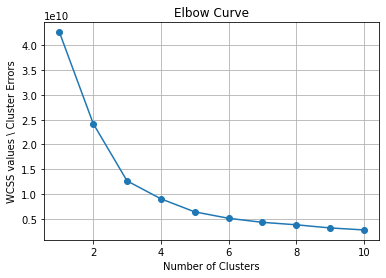

In [126]:
plt.plot(range(1,11,1),wcss,marker='o')
plt.grid()
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS values \ Cluster Errors")
plt.show()

<font color='orange'>Observation</font> :Looks like K=3 has less cluseter erorr but the elbow occurs in k=5

### Plotting Silhoutte score with number of clusters

In [75]:
from sklearn.metrics import silhouette_score


In [76]:
silhouette=[]# sc score
k=[]#Number of clusters 
for i in range(3,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(cust_df)
    silhouette.append(silhouette_score(cust_df,kmeans.labels_))
    k.append(i)



In [77]:
silhoute_df = pd.DataFrame({"K":k,"silhouette_score":silhouette})


In [78]:
silhoute_df.sort_values(by='silhouette_score',ascending=False)

,K,silhouette_score
0,3,0.591733
1,4,0.515106
4,7,0.420755
3,6,0.419619
2,5,0.418496
6,9,0.396333
5,8,0.380454
7,10,0.375058


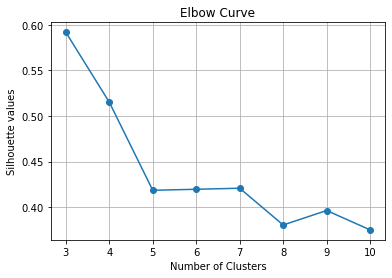

In [79]:
plt.plot(range(3,11,1),silhouette,marker='o')
plt.grid()
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette values")
plt.show()

<font color='orange'>Observation</font> :Looks like K=3 has high silhouette score

### Checking for the percentage of dictribution among clusters 3 to 5

In [84]:
cluster="Cluster_"
for i in range(3,6):
    cluster="Cluster_"
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(cust_df)
    #silhouette.append(silhouette_score(cust_df,kmeans.labels_))
    #k.append(i)
    cluster=cluster+str(i)
    cust_df[cluster]=pd.Series(kmeans.labels_)



### Checking if clusters rage between 4 to 40 percent of obs

In [127]:
#Cluster 3 
cust_df.Cluster_3.value_counts()/cust_df.Cluster_3.shape[0]*100

0    83.923706
1    15.667575
2     0.408719
Name: Cluster_3, dtype: float64

In [86]:
#Cluster 4
cust_df.Cluster_4.value_counts()/cust_df.Cluster_4.shape[0]*100

0    77.179837
3    20.163488
1     2.316076
2     0.340599
Name: Cluster_4, dtype: float64

In [128]:
#Cluster 5
cust_df.Cluster_5.value_counts()/cust_df.Cluster_5.shape[0]*100

2    40.803815
0    38.828338
3    17.847411
4     2.179837
1     0.340599
Name: Cluster_5, dtype: float64

<font color ="Orange">Observation :</font> Cluster 5 doesn't have any big clusters as compared to 3 and 4 segmentations

In [88]:
cluster_5 =cust_df.drop(columns=['CustomerID','Cluster_3','Cluster_4'])

In [98]:
k_seg =cluster_5.pivot_table(index="Cluster_5", aggfunc="mean").sort_values(by="Monetary").reset_index()

# <font color ="Yellow">Segement Profiling </font>
Using K = 5

In [99]:
k_seg

,Cluster_5,Discount_pct,Frequency,Monetary,Prod_Cat_Count,Product_SKU_Count,Quantity,Recency
0,2,20.342321,19.691152,1539.885161,5.020033,19.691152,79.831386,143.472454
1,0,20.237693,20.152632,1550.708266,4.922807,20.152632,80.257895,165.873684
2,3,19.104497,78.072519,7406.454289,8.847328,78.072519,350.526718,115.007634
3,4,19.085294,183.375000,19440.227513,11.312500,183.375000,1066.093750,78.687500
4,1,19.772292,583.800000,61737.798218,14.800000,583.800000,3369.600000,30.200000


In [116]:
cluster_5["Type"]= np.where(cluster_5['Cluster_5']==0,"Standard",np.where(cluster_5['Cluster_5']==1,"Platinum",

np.where(cluster_5["Cluster_5"]==4,"Gold",np.where(cluster_5['Cluster_5']==2,"Occaisonal_Cust","Silver"))))

In [117]:
np.round(cluster_5.groupby("Type").mean(),2).sort_values(by="Monetary",ascending=False)

,Quantity,Monetary,Product_SKU_Count,Prod_Cat_Count,Recency,Discount_pct,Frequency,Cluster_5
Type,,,,,,,,
Platinum,3369.60,61737.80,583.80,14.80,30.20,19.77,583.80,1.0
Gold,1066.09,19440.23,183.38,11.31,78.69,19.09,183.38,4.0
Silver,350.53,7406.45,78.07,8.85,115.01,19.10,78.07,3.0
Standard,80.26,1550.71,20.15,4.92,165.87,20.24,20.15,0.0
Occaisonal_Cust,79.83,1539.89,19.69,5.02,143.47,20.34,19.69,2.0


In [135]:
((np.round(cluster_5.groupby("Type").mean(),2).sort_values(by="Monetary",ascending=False).Monetary)/cluster_5.groupby("Type").mean().sort_values(by="Monetary",ascending=False).Monetary.sum())*100

Type
Platinum           67.344151
Gold               21.205579
Silver              8.079023
Standard            1.691529
Occaisonal_Cust     1.679726
Name: Monetary, dtype: float64

# <Font color="Orange">Observation </font> 
#### From the above segments we can conclude
* Segment 1 -> Platinum Customers
* Segment 4 -> Gold Customers
* Segment 3 -> Silver Customers
* Segment 0 -> Standard Customer
* Segment 2 -> Visiting Customers
### Note: Platinuma and Silver customers alone contribute 81.5% of the revenue